In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import seaborn as sns
import pandas as pd

from datetime import datetime
from datetime import timedelta

from IPython.display import HTML
import bar_chart_race as bcr

In [2]:
# Current date
today = datetime.today()
currDate = today.strftime('%Y%m%d_%H%M')
# yesterday = (today - timedelta(days=1)).strftime('%Y%m%d')
currDateNoTime = today.strftime('%Y%m%d')
yesterday = datetime.today() - timedelta(days=1)  # Get yesterday's date
yesterString = yesterday.strftime('%Y%m%d')  # Format to match columns in df2
yesterdayImportString = yesterday.strftime('%m-%d-%Y')  # Format to match raw csv

print("Import data from " + yesterdayImportString)

Import data from 04-28-2021


## County Pulls

In [3]:
yesterday_data_URL = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/'+yesterdayImportString+'.csv'
# yesterday_data_URL = 'https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_daily_reports/'+yesterdayImportString+'.csv'
print('Reading from \n' + yesterday_data_URL)

raw_df = pd.read_csv(yesterday_data_URL, sep=',')  # , header=0, index_col=0)
raw_df = raw_df.drop(columns=['FIPS', 'Last_Update', 'Lat', 'Long_'])
raw_df = raw_df.loc[raw_df['Country_Region'] == 'US', ['Admin2', 'Province_State', 'Confirmed', 'Deaths', 'Recovered', 'Active', 'Incident_Rate', 'Case_Fatality_Ratio']]

Reading from 
https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/04-28-2021.csv


In [4]:
df_ = raw_df.copy()
df_ = df_.loc[(df_['Province_State'] == 'New York') | (df_['Province_State'] == 'North Carolina') | (df_['Province_State'] == 'Maryland') | (df_['Province_State']  == 'District of Columbia') | (df_['Province_State']  == 'California') | (df_['Province_State']  == 'Florida') | (df_['Province_State']  == 'Connecticut') | (df_['Province_State']  == 'Georgia'), ['Admin2', 'Province_State', 'Confirmed']]
df = df_.loc[(df_['Admin2'] == 'Herkimer') | (df_['Admin2'] == 'Nassau') | (df_['Admin2'] == 'Saratoga') | (df_['Admin2'] == 'Baltimore City') | (df_['Admin2'] == 'Baltimore') | (df_['Admin2'] == 'Durham') | (df_['Admin2'] == 'Wake') | (df_['Admin2'] == 'Orange') | (df_['Admin2'] == 'District of Columbia') | (df_['Admin2'] == 'Sarasota') | (df_['Admin2'] == 'Litchfield') | (df_['Admin2'] == 'Gwinnett')]
df = df.sort_values('Province_State')
df = df.reset_index()

# Changed indices on 20200812, then back on 20200813; On 20201219 added two counties (nee index=[2, 3, 9, 12])
df = df.drop(index=[3, 4, 11, 14])  
df = df.drop(columns=['index', 'Province_State'])
df.at[0, 'Admin2'] = 'Orange (CA)'
df.at[1, 'Admin2'] = 'Litchfield (CT)'
df.at[2, 'Admin2'] = 'DC'
df.at[5, 'Admin2'] = 'Sarasota (FL)'
df.at[6, 'Admin2'] = 'Gwinnett (GA)'
df.at[7, 'Admin2'] = 'Baltimore County'
df.at[9, 'Admin2'] = 'Herkimer (NY)'
df.at[10, 'Admin2'] = 'Nassau (NY)'
df.at[12, 'Admin2'] = 'Saratoga (NY)'
df.at[13, 'Admin2'] = 'Durham (NC)'
df.at[15, 'Admin2'] = 'Wake (NC)'
df = df.rename(columns={"Admin2": "County", "Confirmed":"Positive Cases"})

In [5]:
# NY, MD, NC, Cali, DC
df

,County,Positive Cases
0,Orange (CA),269949
1,Litchfield (CT),14258
2,DC,47533
5,Sarasota (FL),32273
6,Gwinnett (GA),100478
7,Baltimore County,63042
8,Baltimore City,50633
9,Herkimer (NY),4973
10,Nassau (NY),179895
12,Saratoga (NY),14704


# Add ZIP codes

## Add MD ZIP codes

In [6]:
# New automated pull (as of 2021-Apr-06):
MD_data_URL = 'https://state-of-maryland.github.io/OpenDataSource/MDCOVID19_MASTER_ZIP_CODE_CASES.csv'
MD_ZIP_df = pd.read_csv(MD_data_URL)  # , header=0, index_col=0) # , sep=','
MD_col = 'total'+yesterday.strftime('%m_%d_%Y')  # Format to match raw csv
print('Yesterday column name:', MD_col)
df = df.append({'County':'21211', 'Positive Cases':int(MD_ZIP_df.loc[MD_ZIP_df['ZIP_CODE']==21211, MD_col])}, ignore_index=True)
df = df.append({'County':'21212', 'Positive Cases':int(MD_ZIP_df.loc[MD_ZIP_df['ZIP_CODE']==21212, MD_col])}, ignore_index=True)

# OLD manual add:

# # url = 'https://coronavirus.maryland.gov/'
# df = df.append({'County':'21211', 'Positive Cases':795}, ignore_index=True)
# df = df.append({'County':'21212', 'Positive Cases':1742}, ignore_index=True)

Yesterday column name: total04_28_2021


## Add NC ZIP codes

In [50]:
# NC_WRAL_URL = 'https://github.com/wraldata/nc-covid-data/tree/master/zip_level_data/time_series_data/csv'
# Unfortunately, not all days are posted and the filename has a random time
# Couldn't find URL from crosstab in NCDHHS tableau data

In [7]:
# https://covid19.ncdhhs.gov/dashboard
df = df.append({'County':'27613', 'Positive Cases':2898}, ignore_index=True)
df = df.append({'County':'27703', 'Positive Cases':5350}, ignore_index=True)

## DC Neighborhood

In [8]:
# This URL doesn't have Neighborhood data for total cases
# yesterday_DC = yesterday.strftime('%B-%d-%Y')
# DC_URL = 'https://coronavirus.dc.gov/sites/default/files/dc/sites/coronavirus/page_content/attachments/DC-COVID-19-Data-for-'+yesterday_DC+'.xlsx'
# DC_df = pd.read_excel(DC_URL)

In [8]:
# Hill East Neighborhood (N25 -- in Ward 6)
# https://coronavirus.dc.gov/page/coronavirus-data
df = df.append({'County':'Hill East (DC)', 'Positive Cases':625}, ignore_index=True)

# Export dataframe to .csv

In [9]:
# df.to_csv("covid_counts_by_county-"+ currDate + ".csv")
# print("Filename: " + "covid_counts_by_county-" + currDate + ".csv")

# Update overall dataframe

In [10]:
df2 = pd.read_csv("covid_counts_by_county.csv", sep=',', header=0, index_col=0)

In [33]:
previousDayCollected = df2.columns.values[-1]
previousDT = datetime(int(previousDayCollected[:4]), int(previousDayCollected[4:6]), int(previousDayCollected[6:]))
previousDT_str = previousDT.strftime('%Y%m%d')

In [29]:
delta = yesterday - previousDT
delta.days

8

In [34]:
# Updated this section on 20210429 since >5 days had elapsed since last run
if delta.days == 0:  # Yesterday is the only day missing
    df2[yesterString] = df['Positive Cases']  # Just add df
else:  # Multiple days missing
    iterDay = previousDT + timedelta(days=1)
    for i in range(delta.days):  # Loop through the number of missing days
        iterDayStr = iterDay.strftime('%Y%m%d')  # Create new column headers
        df2[iterDayStr] = 0  # Initialize new column headers
        iterDay = iterDay + timedelta(days=1)  # Advance to next day
    
    df2[yesterString] = df['Positive Cases']  # Set the final column to the most recent data
    
    for c in df2.index.values:
        intervalsBetweenPoints = (int(df2.at[c, yesterString]) - int(df2.at[c, previousDT_str])) // delta.days
        iterDay = previousDT + timedelta(days=1)
        for i in range(delta.days):
            iterDayStr = iterDay.strftime('%Y%m%d')
            df2.at[c, iterDayStr] = int(df2.at[c, previousDT_str]) + intervalsBetweenPoints*(i+1)
            iterDay = iterDay + timedelta(days=1)  # Advance to next day

In [36]:
# twoDaysPast = datetime.today() - timedelta(days=2)
# twoback = twoDaysPast.strftime('%Y%m%d')  # Format to match columns in df2
# threeDaysPast = datetime.today() - timedelta(days=3)
# threeback = threeDaysPast.strftime('%Y%m%d')  # Format to match columns in df2
# fourDaysPast = datetime.today() - timedelta(days=4)
# fourback = fourDaysPast.strftime('%Y%m%d')  # Format to match columns in df2
# fiveDaysPast = datetime.today() - timedelta(days=5)
# fiveback = fiveDaysPast.strftime('%Y%m%d')  # Format to match columns in df2
# sixDaysPast = datetime.today() - timedelta(days=6)
# sixback = sixDaysPast.strftime('%Y%m%d')  # Format to match columns in df2
# print(twoback, threeback, fourback, fiveback, sixback)

In [37]:
# if fiveback not in df2.columns.values:  # If five days of data are missing, interpolate
#     print("Missing five days of data.")
#     df2[fiveback] = 0
#     df2[fourback] = 0
#     df2[threeback] = 0
#     df2[twoback] = 0
#     print("Adding interpolated data.")
#     df2[yesterString] = df['Positive Cases']
    
#     for c in df2.index.values:
#         intervalsBetweenPoints = (int(df2.at[c, yesterString]) - int(df2.at[c, sixback])) // 5
#         df2.at[c, fiveback] = int(df2.at[c, sixback]) + intervalsBetweenPoints
#         df2.at[c, fourback] = int(df2.at[c, sixback]) + intervalsBetweenPoints*2
#         df2.at[c, threeback] = int(df2.at[c, sixback]) + intervalsBetweenPoints*3
#         df2.at[c, twoback] = int(df2.at[c, sixback]) + intervalsBetweenPoints*4
# elif fourback not in df2.columns.values:  # If four days of data are missing, interpolate
#     print("Missing four days of data.")
#     df2[fourback] = 0
#     df2[threeback] = 0
#     df2[twoback] = 0
#     print("Adding interpolated data.")
#     df2[yesterString] = df['Positive Cases']
    
#     for c in df2.index.values:
#         intervalsBetweenPoints = (int(df2.at[c, yesterString]) - int(df2.at[c, fiveback])) // 4
#         df2.at[c, fourback] = int(df2.at[c, fiveback]) + intervalsBetweenPoints
#         df2.at[c, threeback] = int(df2.at[c, fiveback]) + intervalsBetweenPoints*2
#         df2.at[c, twoback] = int(df2.at[c, fiveback]) + intervalsBetweenPoints*3
# elif threeback not in df2.columns.values:  # If three days of data are missing, interpolate
#     print("Missing three days of data.")
#     df2[threeback] = 0
#     df2[twoback] = 0
#     print("Adding interpolated data.")
#     df2[yesterString] = df['Positive Cases']
    
#     for c in df2.index.values:
#         intervalsBetweenPoints = (int(df2.at[c, yesterString]) - int(df2.at[c, fourback])) // 3
#         df2.at[c, threeback] = int(df2.at[c, fourback]) + intervalsBetweenPoints
#         df2.at[c, twoback] = int(df2.at[c, fourback]) + intervalsBetweenPoints*2
# elif twoback not in df2.columns.values:  # If data wasn't pulled yesterday, interpolate
#     print("Missing yesterday's data.")
#     df2[twoback] = 0
#     print("Adding interpolated data.")
#     df2[yesterString] = df['Positive Cases']
    
#     for i in df2.index.values:
#         df2.at[i, twoback] = (int(df2.at[i, yesterString]) + int(df2.at[i, threeback])) // 2
# else:
#     df2[yesterString] = df['Positive Cases']

In [38]:
# OLD OLD pop_counts = [61319, 229863, 619500, 827370, 321500, 1112000, 3176000, 702500, 16300, 33342]  # sans AU & NC ZIPs
# New pops (20201219): Gwinnett (GA) -- 936250; Litchfield (CT) -- 180333
# pop_counts = [61319, 1357000, 229863, 619500, 827370, 321500, 1112000, 3176000, 702500, 16300, 33342, 42933, 51163, 9315] # WRONG ORDER
if 'Pop' not in df2.columns.values:
    print("Added Population column")
    # Old population count with NSW
    # pop_counts = [61319, 229863, 619500, 827370, 321500, 1112000, 3176000, 702500, 920370, 9346, 476654, 16300, 33342]
    df2.insert(loc=1, column='Pop', value=pop_counts)  # One time run of population add to each county

In [39]:
if 'Size' not in df2.columns.values:
    print("Added Size and Density columns")
    # Surface area radii (in miles) estimated from https://www.unitedstateszipcodes.org/
    # New (20201219): Gwinnett (GA) -- 17; Litchfield (CT) -- 27
    # radii = [61, 16, 30, 8, 24, 16, 26, 6, 9, 2, 2, 6, 6, 1]  # in miles  # WRONG ORDER
    df2.insert(loc=2, column='Size', value=radii)  # One time run of the size of each county or ZIP
    dense = np.around(np.array(pop_counts) / np.array(radii), 1)
    df2.insert(loc=3, column='Density', value=dense)  # One time run

In [40]:
# Mean/Median household incomes for ZIP codes from https://www.incomebyzipcode.com
# Mean/Median household incomes for counties from https://www.point2homes.com
# DC Mean:  https://dcdataviz.dc.gov/page/ward-income-indicators; DC Median: niche.com
# 134138*132179/108967=Hill East mean estimate of 162712
if 'Mean Income' not in df2.columns.values:
    print("Added Mean/Median Income and Income Inequality columns")
# WRONG ORDER
# Litchfield (Mean: 118802; Median: 86324); Gwinnett (Mean: 90540; Median: 70063)
#     mn_income = [66243, 163969, 111822, 75390, 119116, 79045, 102244, 125325, 149059, 88628, 120198, 119807, 76827, 162712]
#     mdn_income = [52917, 117069, 78402, 52262, 83824, 55851, 76822, 95000, 88553, 68425, 77699, 96185, 60438, 134138]
    income_x = np.around(np.array(mn_income) / np.array(mdn_income), 2)
    df2.insert(loc=4, column='Mean Income', value=mn_income)  # One time run
    df2.insert(loc=5, column='Median Income', value=mdn_income)  # One time run
    df2.insert(loc=6, column='Income Inequality', value=income_x)  # One time run

In [41]:
df2

,County,Pop,Size,Density,Mean Income,Median Income,Income Inequality,20200329,20200330,20200331,...,20210419,20210420,20210421,20210422,20210423,20210424,20210425,20210426,20210427,20210428
0,Orange (CA),3176000,6,529333.3,125325,95000,1.32,403,431,464,...,269071,269176,269272,269368,269464,269560,269656,269752,269848,269944
1,Litchfield (CT),180333,27,6679.0,118802,86324,1.38,113,121,131,...,13988,14034,14062,14090,14118,14146,14174,14202,14230,14258
2,DC,702500,9,78055.6,149059,88553,1.68,342,401,495,...,46764,46869,46952,47035,47118,47201,47284,47367,47450,47533
3,Sarasota (FL),433742,20,21687.1,79614,47884,1.66,62,70,82,...,31449,31567,31655,31743,31831,31919,32007,32095,32183,32271
4,Gwinnett (GA),936250,17,55073.5,90540,70063,1.29,158,238,250,...,99267,99390,99526,99662,99798,99934,100070,100206,100342,100478
5,Baltimore County,827370,24,34473.8,119116,83824,1.42,162,186,227,...,61055,61278,61498,61718,61938,62158,62378,62598,62818,63038
6,Baltimore City,619500,8,77437.5,75390,52262,1.44,129,152,187,...,49200,49409,49562,49715,49868,50021,50174,50327,50480,50633
7,Herkimer (NY),61319,61,1005.2,66243,52917,1.25,9,10,12,...,4933,4941,4945,4949,4953,4957,4961,4965,4969,4973
8,Nassau (NY),1357000,16,84812.5,163969,117069,1.40,6445,7344,8544,...,177548,177933,178178,178423,178668,178913,179158,179403,179648,179893
9,Saratoga (NY),229863,30,7662.1,111822,78402,1.43,96,102,105,...,14437,14477,14505,14533,14561,14589,14617,14645,14673,14701


In [42]:
df2.to_csv("covid_counts_by_county.csv")

### Double rate

In [43]:
# double_dates = np.empty(len(df2['County'], dtype=int))
double_dates = []
for county in df2['County']:
#     print(county)  # TMP
    daysUntilDouble = -1
    doubled = False
    for col in df2.columns.values[:1:-1]:  # Consider changing end step 1-> 6
#         print("Day: " + str(col))  # TMP
        daysUntilDouble += 1
        if col == '20200404':  # Did not pull anything on 20200405, so need to add another day
            daysUntilDouble += 1
            
        # Insert a break when NaN encountered (to next county)
        if col == yesterString:  # Today
            today_count = int(df2.loc[df2['County']==county, col])
            half_today = today_count/2
        else:  # Not today
            try:
                currCount = int(df2.loc[df2['County']==county, col])
#                 print(currCount)  # TMP
            except:
                currCount = np.nan
            
            if not np.isnan(currCount): # NaN Check
                if currCount <= half_today:
                    print(county + " doubled in " + str(daysUntilDouble) + " days")
                    doubled = True
                    double_dates += [daysUntilDouble]
                    break  # Found double day, go to next county
                elif col == '20200329':
                    print(county + " HAS NOT doubled within " + str(daysUntilDouble) + " days")
                    double_dates += ['>'+str(daysUntilDouble)]
            else:  # Value is NaN
                if not doubled:
                    print(county + " HAS NOT doubled within " + str(daysUntilDouble) + " days")
                    double_dates += ['>'+str(daysUntilDouble)]
                break  # Leave day loop, go to next county

Orange (CA) doubled in 126 days
Litchfield (CT) doubled in 122 days
DC doubled in 141 days
Sarasota (FL) doubled in 134 days
Gwinnett (GA) doubled in 130 days
Baltimore County doubled in 143 days
Baltimore City doubled in 146 days
Herkimer (NY) doubled in 114 days
Nassau (NY) doubled in 117 days
Saratoga (NY) doubled in 110 days
Durham (NC) doubled in 139 days
Wake (NC) doubled in 120 days
21211  (MD) doubled in 142 days
21212 (K+J) doubled in 140 days
27613 (NC) doubled in 119 days
27703 (NC) doubled in 141 days
Hill East (DC) doubled in 125 days


### Normalized Case Count & Daily/Weekly/Monthly Rise

In [77]:
# print(df2.columns.values[2:])
# print(df2.columns.values[-1])

twoBack = df2.columns.values[-2]
weekBack = df2.columns.values[-8]
fortnightBack = df2.columns.values[-15]

In [78]:
# Take the actual number of cases and divide by population
df3 = df2.copy()
df3['Density'] = np.around(df3['Density']/1000, 1)

START_IDX = 6

# Fourth version
df3 = df3.drop(columns='Size')  # Drop Size
df3 = df3.drop(columns=df3.columns.values[START_IDX:-15])  # Up to previous fortnight
df3 = df3.drop(columns=df3.columns.values[(START_IDX+1):-8])  # Up to previous week
df3 = df3.drop(columns=df3.columns.values[(START_IDX+2):-2])  # Up to previous day

In [79]:
df3.columns.values

array(['County', 'Pop', 'Density', 'Mean Income', 'Median Income',
       'Income Inequality', '20210414', '20210421', '20210427',
       '20210428'], dtype=object)

In [80]:
# Add the 2020(current month -1)DD column after 'Pop'
currMonth = yesterString[4:6]  # Incorrect, one day ahead?
currYear = yesterString[:4]
# currMonth = currDateNoTime[4:6]  # Incorrect, one day ahead?

prevMonth = str(int(currMonth)-1)
if len(prevMonth) == 1:
    prevMonth = "0" + prevMonth

if (currYear + currMonth) == "202101":
    monthBack = '202012' + yesterString[6:]
else:
    monthBack = currYear + prevMonth + yesterString[6:]

In [81]:
if monthBack not in df2.columns.values:
    print("WARNING: This date did not exist in the previous month.  Trying an earlier day.")
    monthBack = monthBack[:6] + str(int(monthBack[6:])-1)
    if monthBack not in df2.columns.values:
        print("WARNING: Second date did not exist in the previous month.  Trying an earlier day.")
        monthBack = monthBack[:6] + str(int(monthBack[6:])-2)
df3.insert(loc=START_IDX, column=monthBack, value=df2[monthBack])

# df3 = df3.drop(range(2, -1), axis=1)
# df3 = df2.iloc[:, [0, 1, -1]]
df3['Cases per 1k'] = np.zeros(len(df3), dtype='float')
df3['Day Rise'] = np.zeros(len(df3), dtype='float')
df3['Week Rise'] = np.zeros(len(df3), dtype='float')
df3['Fortnight Rise'] = np.zeros(len(df3), dtype='float')
df3['Month Rise'] = np.zeros(len(df3), dtype='float')
df3['Days Since Half'] = np.array(double_dates, dtype=str)

In [82]:
# 'Size', 'Density', 'Mean Income', 'Median Income', 'Income Inequality' 
df3.astype({'Pop': 'int64', 'Mean Income': 'int32', 'Median Income': 'int32', 'Income Inequality': 'int32'}).dtypes
# df3.astype({monthBack: 'int32', fortnightBack: 'int32', weekBack: 'int32', yesterString: 'int32', currDateNoTime: 'int32'}).dtypes
df3.astype({twoBack: 'int32', yesterString: 'int32'}).dtypes

for row in range(len(df3)):
#     print(df3.loc[row, df3.columns.values[-2]])  # Some of these are still strings... unclear why
#     print(int(df3.loc[row, df3.columns.values[-2]]) / int(df3.loc[row, 'Pop']))
    df3.loc[row, 'Cases per 1k'] = np.around(int(df3.loc[row, yesterString]) / int(df3.loc[row, 'Pop']) * 1000, 1)
    df3.loc[row, 'Day Rise'] = np.around(int(df3.loc[row, yesterString]) / int(df3.loc[row, twoBack]), 2)
    df3.loc[row, 'Week Rise'] = np.around(int(df3.loc[row, yesterString]) / int(df3.loc[row, weekBack]), 2)
    df3.loc[row, 'Fortnight Rise'] = np.around(int(df3.loc[row, yesterString]) / int(df3.loc[row, fortnightBack]), 2)
    df3.loc[row, 'Month Rise'] = np.around(int(df3.loc[row, yesterString]) / int(df3.loc[row, monthBack]), 2)

In [83]:
df3

,County,Pop,Density,Mean Income,Median Income,Income Inequality,20210328,20210414,20210421,20210427,20210428,Cases per 1k,Day Rise,Week Rise,Fortnight Rise,Month Rise,Days Since Half
0,Orange (CA),3176000,529.3,125325,95000,1.32,265787,268521,269272,269848,269944,85.0,1.0,1.00,1.01,1.02,126
1,Litchfield (CT),180333,6.7,118802,86324,1.38,12518,13761,14062,14230,14258,79.1,1.0,1.01,1.04,1.14,122
2,DC,702500,78.1,149059,88553,1.68,44175,46209,46952,47450,47533,67.7,1.0,1.01,1.03,1.08,141
3,Sarasota (FL),433742,21.7,79614,47884,1.66,29096,30849,31655,32183,32271,74.4,1.0,1.02,1.05,1.11,134
4,Gwinnett (GA),936250,55.1,90540,70063,1.29,96486,98582,99526,100342,100478,107.3,1.0,1.01,1.02,1.04,130
5,Baltimore County,827370,34.5,119116,83824,1.42,55245,59751,61498,62818,63038,76.2,1.0,1.03,1.06,1.14,143
6,Baltimore City,619500,77.4,75390,52262,1.44,44016,48045,49562,50480,50633,81.7,1.0,1.02,1.05,1.15,146
7,Herkimer (NY),61319,1.0,66243,52917,1.25,4754,4883,4945,4969,4973,81.1,1.0,1.01,1.02,1.05,114
8,Nassau (NY),1357000,84.8,163969,117069,1.40,165785,175392,178178,179648,179893,132.6,1.0,1.01,1.03,1.09,117
9,Saratoga (NY),229863,7.7,111822,78402,1.43,13217,14222,14505,14673,14701,64.0,1.0,1.01,1.03,1.11,110


## Filling in Unknown data
To fill in all 21211/21212 data before 20200413: <br>
Took the average percentage of 21211 cases of Balt. City total (\~1%) and 21212 cases of Balt. County cases (\~2%) between 20200413 and 20200518 (inclusive) <br>
Divided the average multiplier between Wake/27613 and Durham/27703 for June and applied it to dates prior to 20200520. <br>
Divided the average multiplier between DC and Hill East for June and applied it to dates prior to 20200530. <br>

## Plotting Case Increases

In [84]:
# Color Brewer palettes found: https://www.codecademy.com/articles/seaborn-design-ii
# paletteAll = sns.color_palette("rainbow", n_colors=len(df2))

paletteRandos = sns.color_palette("tab10")
# paletteRandos[5]  # Litchfield
paletteO = sns.color_palette("Oranges")
# paletteO[0]  # Gwinnett
# paletteO[3]  # OC
paletteReds = sns.color_palette("Reds", n_colors=10)
# paletteReds[4:]  # Hill East (6) & DC (9)
paletteYlOrBr = sns.color_palette("YlOrBr", n_colors=10)
# paletteYlOrBr[1]  # Sarasota (FL)
paletteBlues = sns.color_palette("Blues", n_colors=10)
# paletteBlues  # Saratoga (5) & Herkimer (7) & Nassau (9)
paletteGreens = sns.color_palette("Greens", n_colors=10)
# paletteGreens  # 21211 (2) & 21212 (4) & Baltimore City (6) & Baltimore County (8)
palettePurples = sns.color_palette("Purples", n_colors=10)
# palettePurples  # 27613 (2) & 27703 (4) & Wake (7) & Durham (9)

paletteAll = [paletteO[3], paletteRandos[5], paletteReds[9], paletteYlOrBr[1], paletteO[0], paletteGreens[8], 
              paletteGreens[6], paletteBlues[7], paletteBlues[9], paletteBlues[5], palettePurples[9], 
              palettePurples[7], paletteGreens[2], paletteGreens[4], palettePurples[2], palettePurples[4], 
              paletteReds[6]]
# sns.palplot(paletteAll)

In [85]:
dates = []
date_labels = []
cnt = 0
for date in df2.columns.values[START_IDX+1:]:
    # dates += [date[5:]]
#     print(date[4:])
    dates += [date[4:6] + "\n" + date[6:] + "\n" + date[2:4]]
    if (cnt == 0) or (cnt == (len(df2.columns.values[START_IDX+1:])-1)) or (date[6:] == "01") or \
        (date[6:] == "07") or (date[6:] == "14") or (date[6:] == "21") or (date[6:] == "28"):
        date_labels += [date[4:6] + "\n" + date[6:]]
        cnt += 1
    else:
         date_labels += [""]

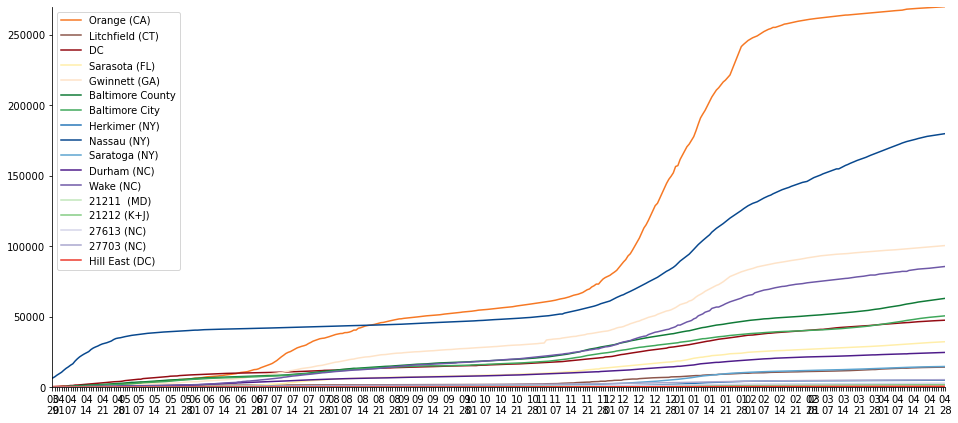

In [86]:
plt.figure(figsize=(16, 7))
i=0
for county in df2['County']:
    plt.plot(dates, df2.loc[df2['County']==county, df2.columns.values[START_IDX+1:]].values.reshape([-1, 1]), 
             label=county, color=paletteAll[i])
    i+=1
    # df2.loc[df2['County']=='Herkimer', df2.columns.values[2:]].values
counts = np.sort(df3[yesterString])
plt.ylim([-5, counts[-1]])
plt.xlim([dates[0], dates[-1]])
plt.xticks(dates, date_labels, fontsize=10)
sns.despine()
plt.legend(loc='upper left');

## Normed increases

In [87]:
df4 = df2.copy()
for col in df4.columns.values[START_IDX+1:]:
    df4[col+"-norm1k"] = np.around(df4[col]/df4['Pop']*1000, 1)

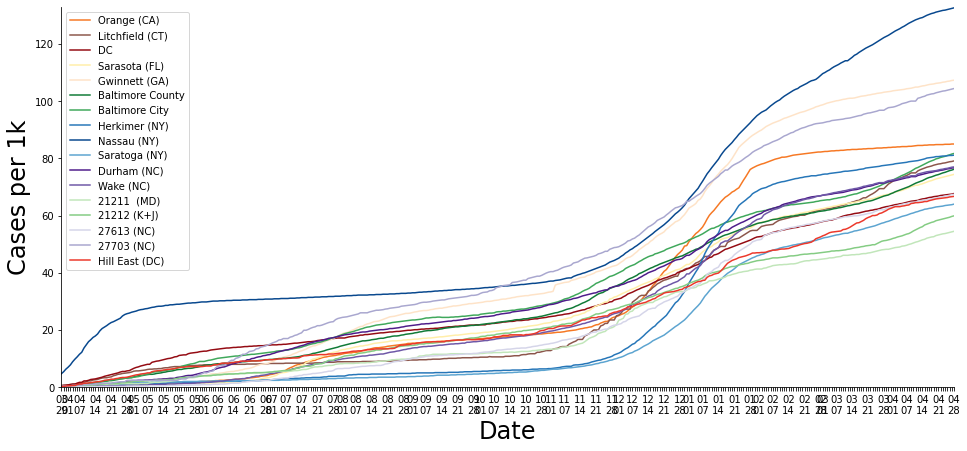

In [88]:
plt.figure(figsize=(16, 7))
i=0
for county in df2['County']:
    plt.plot(dates, df4.loc[df4['County']==county, df4.columns.values[-(len(dates)):]].values.reshape([-1, 1]), 
             label=county, color=paletteAll[i])
    i+=1
counts = np.sort(df3['Cases per 1k'])
plt.ylim([0, np.ceil(counts[-1])])  # Upper bound of highest value
plt.xlim([dates[0], dates[-1]])
plt.xticks(dates, date_labels, fontsize=10)
plt.xlabel("Date", fontsize=24)
plt.ylabel("Cases per 1k", fontsize=24)
sns.despine()
plt.legend(loc='upper left');  # 'upper center'

# END OF NON-VIDEO CODE

# Race bar chart

## Data Formatting & Cleaning

In [89]:
raceDF = df4.copy()
raceDF = raceDF.drop(columns=['Density', 'Income Inequality'])

for col in raceDF.columns.values:
    if col != 'County' and not isinstance(raceDF[col][0], np.float64):
        raceDF = raceDF.drop(columns=[col])
    elif col != 'County':  # Need to rename the column header to remove "-norm1k"
        raceDF = raceDF.rename(columns={col:col[:-7]})

In [90]:
raceDF = raceDF.set_index('County').T
raceDF.reset_index(drop=False, inplace=True)
raceDF = raceDF.set_index('index').rename_axis('date')

## Use bar-chart-race to make animation

In [91]:
yesterYearString = '2020'+yesterString[4:]
yesterYearString

'20200428'

In [33]:
# # OLD VERSION: Previously used 150ms per period
# bcr.bar_chart_race(df=raceDF, filename='CasesThrough'+raceDF.index.values[-1]+".mp4", 
#                    steps_per_period=5, period_length=100, cmap=paletteAll, title='Cases per 1k people')

In [93]:
# Uncomment to make a new movie
# Note: FixedFormatter warning thrown when using Python 3.8 because of bcr incompability (use 3.7)

# bcr.bar_chart_race(df=raceDF[raceDF.index.values>=yesterYearString], filename='PastYearCasesThrough'+raceDF.index.values[-1]+".mp4", 
#                    steps_per_period=5, period_length=125, cmap=paletteAll, title='Cases per 1k people')

# Tutorial for manual plotting
Instructions from: https://medium.com/dunder-data/create-a-bar-chart-race-animation-in-python-with-matplotlib-477ed1590096
<br>
and: https://pypi.org/project/bar-chart-race/

In [35]:
def nice_axes(ax):
    ax.set_facecolor('.96')  # Background color (1 is white)
    ax.tick_params(labelsize=8, length=0)
    ax.grid(True, axis='x', color='white')  # For vertical lines
    ax.set_axisbelow(True)
    [spine.set_visible(False) for spine in ax.spines.values()]

In [36]:
def prepare_data(df, steps=5):
    df = df.reset_index()
    df.index = df.index * steps
    last_idx = df.index[-1] + 1
    df_expanded = df.reindex(range(last_idx))
    df_expanded['date'] = df_expanded['date'].fillna(method='ffill')
    df_expanded = df_expanded.set_index('date')
    df_rank_expanded = df_expanded.rank(axis=1, method='first')
    df_expanded = df_expanded.interpolate()
    df_rank_expanded = df_rank_expanded.interpolate()
    return df_expanded, df_rank_expanded

In [37]:
def init():
    ax.clear()
    nice_axes(ax)
    ax.set_ylim(.2, 6.8)

def update(i):
    for bar in ax.containers:
        bar.remove()
    y = df_rank_expanded.iloc[i]
    width = df_expanded.iloc[i]
    ax.barh(y=y, width=width, color=paletteAll, tick_label=labels)  # labels is the df_expanded.columns
    date_str = df_expanded.index[i].strftime('%B %-d, %Y')
    ax.set_title(f'COVID-19 Deaths by Country - {date_str}', fontsize='smaller')

In [38]:
# s1 = raceDF.loc['20200329']
# s2 = raceDF.loc['20201204']
# s2

In [39]:
# fig, ax = plt.subplots(figsize=(4, 2.5), dpi=144)
# # colors = plt.cm.Dark2(range(6))
# y = s1.index
# width = s1.values
# ax.barh(y=y, width=width, color=paletteAll);  #

In [40]:
# fig, ax = plt.subplots(figsize=(4, 2.5), dpi=144)
# # colors = plt.cm.Dark2(range(6))
# y = s2.index
# width = s2.values
# ax.barh(y=y, width=width, color=paletteAll);  #

In [41]:
# nice_axes(ax)
# fig

In [42]:
# fig, ax_array = plt.subplots(nrows=1, ncols=3, figsize=(7, 2.5), dpi=144, tight_layout=True)
# dates = ['20200329', '20200330', '20200331']
# for ax, date in zip(ax_array, dates):
#     s = raceDF.loc[date].sort_values()
#     ax.barh(y=s.index, width=s.values, color=paletteAll)
#     ax.set_title(date, fontsize='smaller')
#     nice_axes(ax)

In [43]:
# raceDF.loc['20200329'].rank(method='first')

In [44]:
# fig, ax_array = plt.subplots(nrows=1, ncols=3, figsize=(7, 2.5), dpi=144, tight_layout=True)
# dates = ['20200329', '20200330', '20200331']
# for ax, date in zip(ax_array, dates):
#     s = raceDF.loc[date]
#     y = raceDF.loc[date].rank(method='first').values
#     ax.barh(y=y, width=s.values, color=paletteAll, tick_label=s.index)
#     ax.set_title(date, fontsize='smaller')
#     nice_axes(ax)

In [45]:
# eDF = raceDF.loc['20200329':'20200331']
# eDF

In [46]:
# eDF = eDF.reset_index()
# eDF

In [47]:
# eDF.index = eDF.index * 5
# eDF

In [48]:
# last_idx = eDF.index[-1] + 1
# df_expanded = eDF.reindex(range(last_idx))
# df_expanded

In [49]:
# df_expanded['date'] = df_expanded['date'].fillna(method='ffill')  # forward fill
# df_expanded = df_expanded.set_index('date')
# df_expanded

In [50]:
# df_rank_expanded = df_expanded.rank(axis=1, method='first')
# df_rank_expanded

In [51]:
# df_expanded = df_expanded.interpolate()
# df_expanded

In [52]:
# df_rank_expanded = df_rank_expanded.interpolate()
# df_rank_expanded

In [53]:
# fig, ax_array = plt.subplots(nrows=1, ncols=6, figsize=(12, 2), 
#                              dpi=144, tight_layout=True)
# labels = df_expanded.columns
# for i, ax in enumerate(ax_array.flatten()):
#     y = df_rank_expanded.iloc[i]
#     width = df_expanded.iloc[i]
#     ax.barh(y=y, width=width, color=paletteAll, tick_label=labels)
#     nice_axes(ax)
# ax_array[0].set_title('20200329')
# ax_array[-1].set_title('20200330');

In [54]:
# fig, ax_array = plt.subplots(nrows=1, ncols=6, figsize=(12, 2), 
#                              dpi=144, tight_layout=True)
# labels = df_expanded.columns
# for i, ax in enumerate(ax_array.flatten(), start=5):
#     y = df_rank_expanded.iloc[i]
#     width = df_expanded.iloc[i]
#     ax.barh(y=y, width=width, color=paletteAll, tick_label=labels)
#     nice_axes(ax)
# ax_array[0].set_title('20200330')
# ax_array[-1].set_title('20200331');

In [55]:
# df_expanded, df_rank_expanded = prepare_data(raceDF)
# df_expanded.head()

In [56]:
# df_rank_expanded.head()